https://www.tensorflow.org/tutorials/images/cnn?hl=ja

# 畳み込みニューラルネットワーク

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [50]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [51]:
files = glob(r'../cifar-10-batches-py/data_batch*')
dict1 = unpickle(files[0])
dict2 = unpickle(files[1])
dict3 = unpickle(files[2])
dict4 = unpickle(files[3])
dict5 = unpickle(files[4])
train_labels = np.array(dict1[b'labels'] + dict2[b'labels'] + dict3[b'labels'] + dict4[b'labels'] + dict5[b'labels'])
input_train_images = np.concatenate([dict1[b'data'], dict2[b'data'], dict3[b'data'], dict4[b'data'], dict5[b'data']])
input_train_images.shape, train_labels.shape

((50000, 3072), (50000,))

In [52]:
files = glob(r'../cifar-10-batches-py/test_batch')
dict6 = unpickle(files[0])
test_labels = np.array(dict6[b'labels'])
input_test_images = dict6[b'data']
input_test_images.shape, test_labels.shape

((10000, 3072), (10000,))

In [53]:
train_images = np.array([np.rollaxis(img.reshape(3, 32, 32), 0, 3).astype(int) for img in input_train_images])
test_images = np.array([np.rollaxis(img.reshape(3, 32, 32), 0, 3).astype(int) for img in input_test_images])

In [54]:
for i in train_images[0]:
    print(i)

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]
[[ 16  20  20]
 [  0   0   0]
 [ 18   8   0]
 [ 51  27   8]
 [ 88  51  21]
 [120  82  43]
 [128  89  45]
 [127  86  44]
 [126  87  50]
 [116  79  44]
 [106  70  37]
 [101  67  35]
 [105  70  36]
 [113  74  35]
 [109  70  33]
 [112  72  37]
 [119  79  44]
 [109  71  33]
 [105  69  27]
 [125  89  46]
 [127  92  46]
 [122  85  39]
 [131  89  47]
 [124  82  41]
 [121  79  37]
 [131  89  48]
 [132  91  53]
 [133  94  58]
 [133  96  60]
 [123  88  55]
 [119  83  50]
 [122  87  57]]
[[ 25  24  21]
 [ 16   7   0]
 [ 49  2

In [29]:
# train_images = []
# for img in input_train_images:
#     img = np.rollaxis(img.reshape(3, 32, 32), 0, 3).astype(int)
#     train_images.append(img)
# train_images = np.array(train_images)
# plt.imshow(train_images[0])

In [30]:
# test_images = []
# for img in input_test_images:
#     img = np.rollaxis(img.reshape(3, 32, 32), 0, 3).astype(int)
#     test_images.append(img)
# test_images = np.array(test_images)
# plt.imshow(test_images[0])

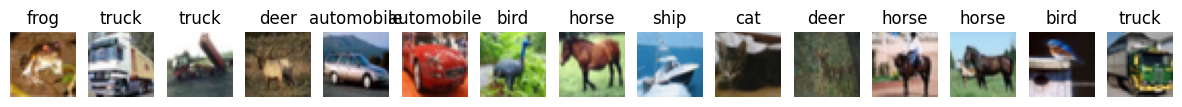

In [31]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck",]
plt.figure(figsize=(15, 3))
for i in range(15):
    plt.subplot(1, 15, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.axis("off")

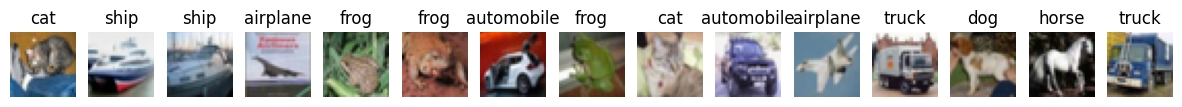

In [32]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck",]
plt.figure(figsize=(15, 3))
for i in range(15):
    plt.subplot(1, 15, i + 1)
    plt.imshow(test_images[i])
    plt.title(class_names[test_labels[i]])
    plt.axis("off")

In [33]:
# データの正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

# model.summary()

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    verbose=1,
    validation_data=(test_images, test_labels),
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.3445 - loss: 1.7739 - val_accuracy: 0.5234 - val_loss: 1.3209
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.5647 - loss: 1.2222 - val_accuracy: 0.6076 - val_loss: 1.1020
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6351 - loss: 1.0319 - val_accuracy: 0.6460 - val_loss: 1.0110
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.6674 - loss: 0.9434 - val_accuracy: 0.6754 - val_loss: 0.9287
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 24ms/step - accuracy: 0.6959 - loss: 0.8642 - val_accuracy: 0.6818 - val_loss: 0.9139
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7181 - loss: 0.8015 - val_accuracy: 0.6772 - val_loss: 0.9405
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7377 - loss: 0.7458 - val_accuracy: 0.6992 - val_loss: 0.8693
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7530 -

In [36]:
# モデル保存
MODEL_FILE_PATH = 'tensorflow_test_05.keras'
model.save(MODEL_FILE_PATH)

0.6998999714851379


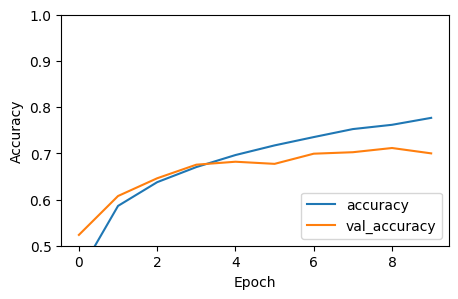

In [45]:
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(history.history['val_accuracy'][-1])

In [108]:
for y in y_train:
    print(y, end=', ')

NameError: name 'y_train' is not defined

In [109]:
for x in x_test[1]:
    for i in x:
        if i != 0:
            print('o', end=' ')
        else:
            print('-', end=' ')
    print()

NameError: name 'x_test' is not defined

In [110]:
for y in y_test:
    print(y, end=', ')

NameError: name 'y_test' is not defined

NameError: name 'y_train' is not defined

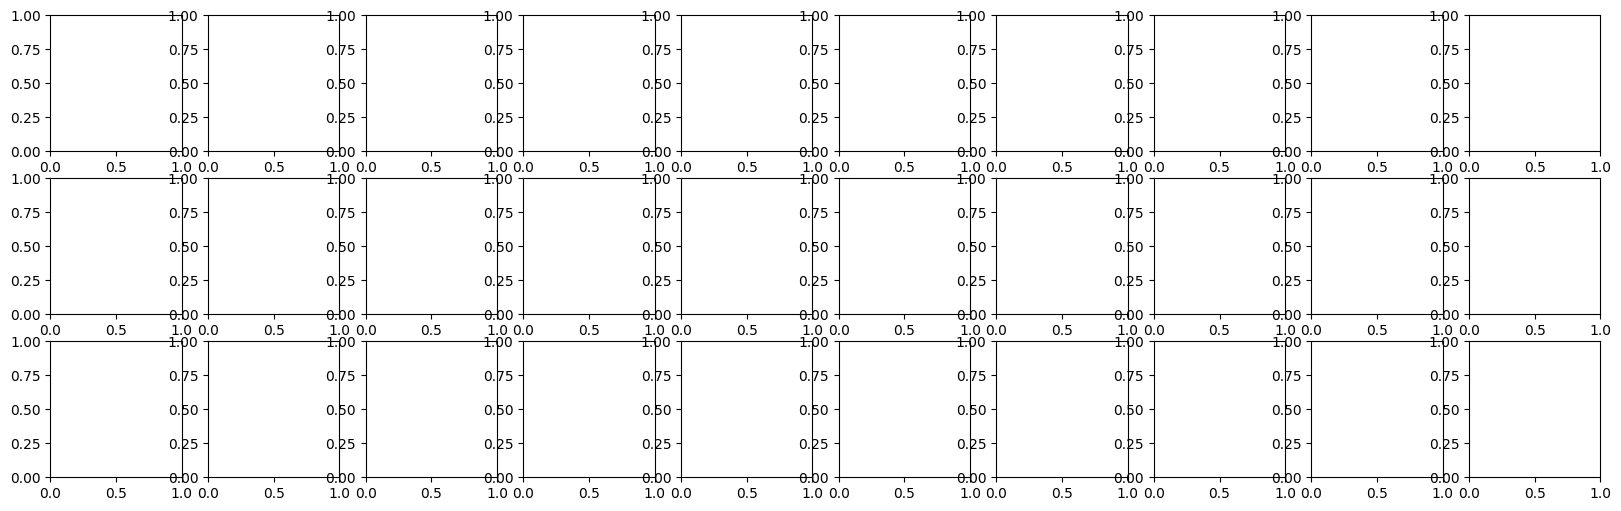

In [111]:
# train data display
row, col = 3, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(0, y_train.shape[0])
        axs[i, j].imshow(x_train[num], cmap="gray")
        axs[i, j].set_title(f'No{num}, train={y_train[num]}')
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

- 損失関数
  - one-hot 表現でラベルが作成されている場合は CategoricalCrossentropy を利用
  - 整数でラベルが作成されている場合は、SparseCategoricalCrossentropy を利用
    - クロスエントロピー誤差
    $$ E = - \sum_k t_k \log y_k $$


In [39]:
BATCH_SIZE = 2**7
EPOCHS = 10

CSV_FILE_PATH = "tensorflow_test_01.csv"
MODEL_FILE_PATH = 'tensorflow_test_01.keras'

In [40]:
# CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])
# model.summary()

# 損失関数
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# モデルの構成とコンパイル
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# callbacks
callbacks = [tf.keras.callbacks.CSVLogger(CSV_FILE_PATH)]
# トレーニングと評価
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)
# モデル保存
model.save(MODEL_FILE_PATH)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8054 - loss: 0.6662 - val_accuracy: 0.9434 - val_loss: 0.1908
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9423 - loss: 0.2010 - val_accuracy: 0.9583 - val_loss: 0.1370
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9564 - loss: 0.1497 - val_accuracy: 0.9675 - val_loss: 0.1113
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9663 - loss: 0.1187 - val_accuracy: 0.9713 - val_loss: 0.0984
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9713 - loss: 0.0989 - val_accuracy: 0.9748 - val_loss: 0.0850
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9752 - loss: 0.0817 - val_accuracy: 0.9775 - val_loss: 0.0755
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9774 - loss: 0.0735 - val_accuracy: 0.9778 - val_loss: 0.0733
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9801 - loss: 0.0660 - val_accuracy: 0.

- accuracy : トレーニングデータに対する精度
- loss : トレーニングデータに対する損失
- val_accuracy : 検証データに対する正解率
- val_loss : 検証データに対する損失

In [41]:
# for k, v in history.history.items():
#     print(k, v)

In [42]:
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [43]:
df = pd.read_csv(CSV_FILE_PATH)
df.tail(3)

,epoch,accuracy,loss,val_accuracy,val_loss
7,7,0.97958,0.06669,0.97770,0.07417
8,8,0.98153,0.06102,0.97750,0.07133
9,9,0.98233,0.05530,0.97840,0.07222


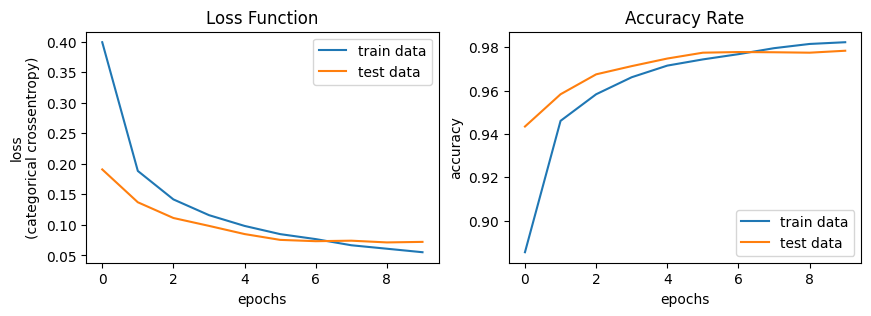

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(df['epoch'], df['loss'], label="train data")
axs[0].plot(df['epoch'], df['val_loss'], label="test data")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("loss\n(categorical crossentropy)")
axs[0].set_title('Loss Function')
axs[0].legend(loc="upper right")

axs[1].plot(df['epoch'], df['accuracy'], label="train data")
axs[1].plot(df['epoch'], df['val_accuracy'], label="test data")
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("accuracy")
axs[1].set_title('Accuracy Rate')
axs[1].legend(loc="lower right")

plt.show()

In [51]:
# 確率に変換
pd.options.display.float_format = '{:.05f}'.format
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
df_prob = pd.DataFrame(probability_model(x_test))
df_prob['prob'] = df_prob.iloc[:, 0:10].idxmax(axis=1)
df_prob['y_test'] = y_test
df_prob.head(3)

,0,1,2,3,4,5,6,7,8,9,prob,y_test
0,0.00000,0.00000,0.00002,0.00022,0.00000,0.00000,0.00000,0.99973,0.00000,0.00003,7,7
1,0.00000,0.00006,0.99994,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2,2
2,0.00000,0.99828,0.00076,0.00002,0.00008,0.00002,0.00002,0.00026,0.00055,0.00000,1,1


In [52]:
# 予測が異なる数
df_prob[df_prob['prob'] != df_prob['y_test']].count()[0]

216

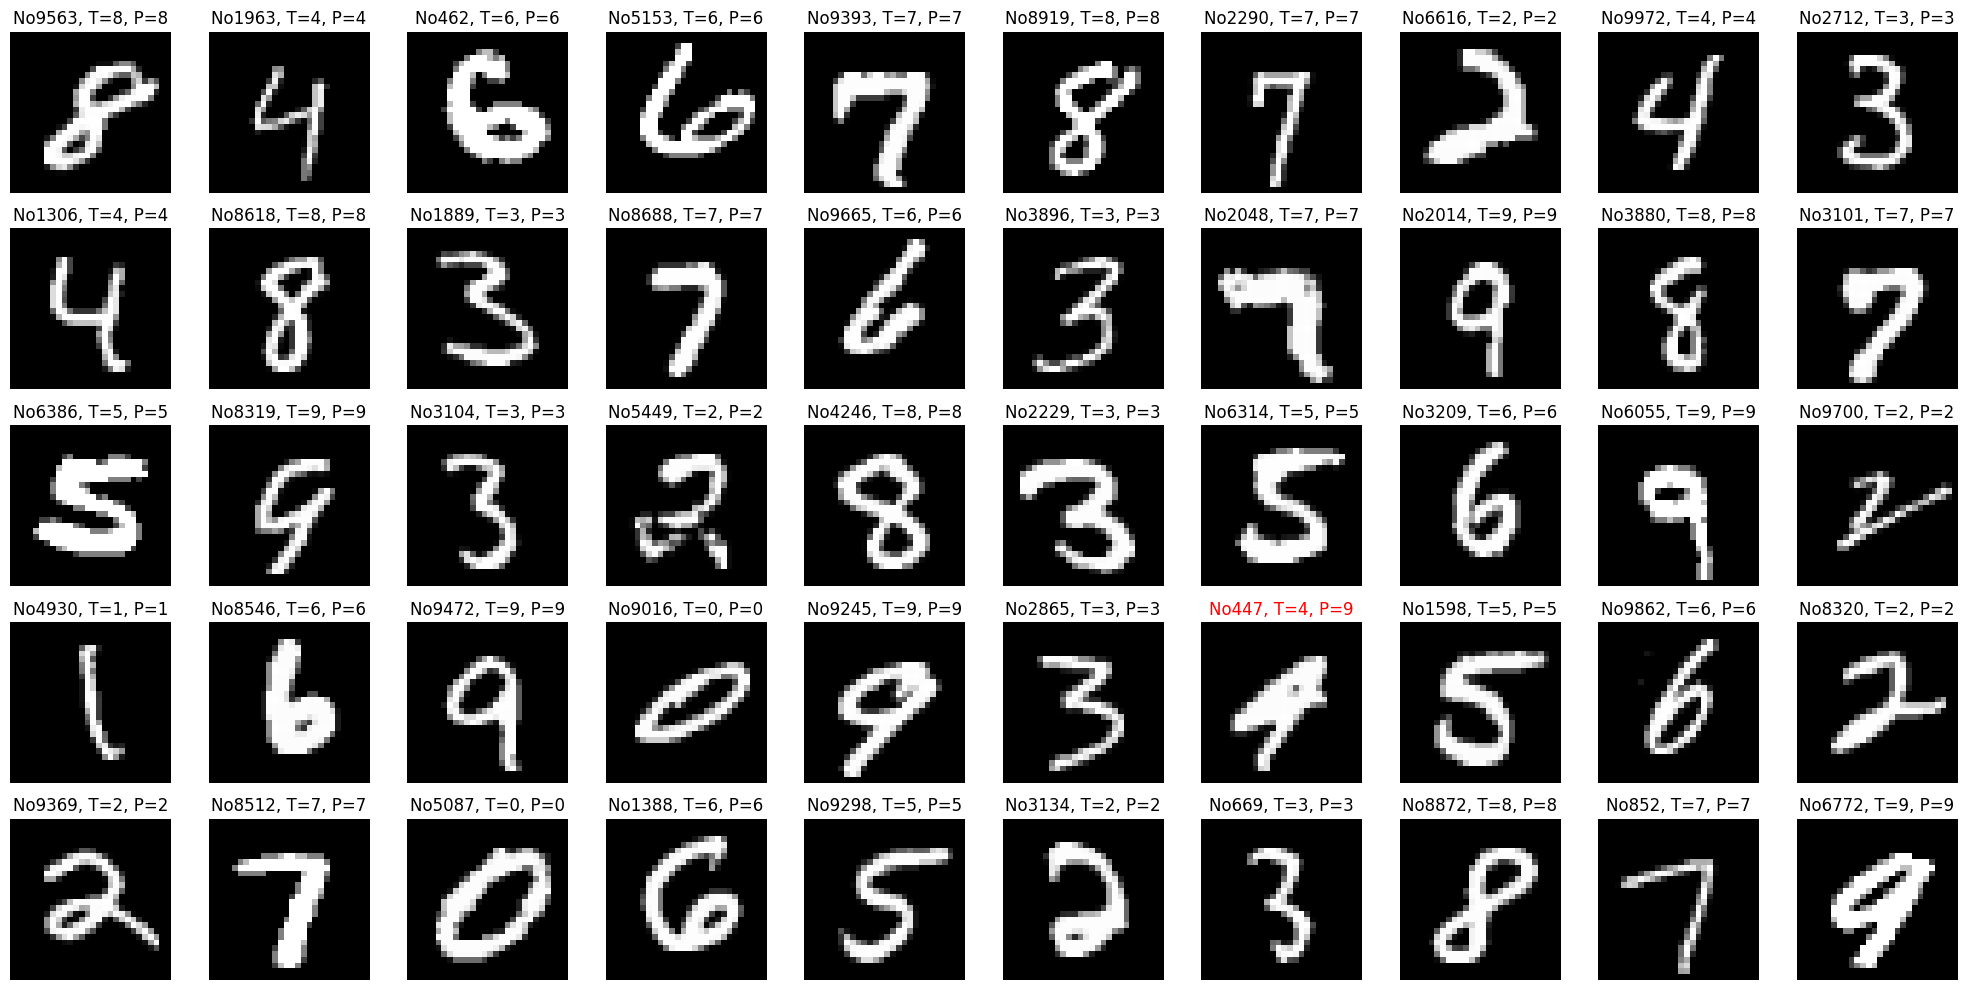

In [47]:
# 50枚ランダムに確認
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(10000)
        axs[i][j].imshow(x_test[num], cmap="gray")
        pred = df_prob.iloc[num, :-2].idxmax()
        y_ = y_test[num]
        axs[i][j].set_title(f'No{num}, T={y_}, P={pred}')
        if pred != y_:
            axs[i][j].set_title(f'No{num}, T={y_}, P={pred}', color='r')
        axs[i][j].axis('off')
plt.tight_layout()
plt.show()